In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt


Problem 1

In [2]:
X = np.linspace(-10, 10 ,200)
Y = np.linspace(-10, 10 ,200)

In [3]:
p = np.empty((len(Y), len(X)))
for i in range(len(X)):
    for j in range(len(Y)):
        p[j, i] = np.exp(-((X[i] -Y[j]) ** 2) / 2)*1/(1+Y[j]**2)


In [4]:
s = np.sum(p)
for i in range(len(X)):
    for j in range(len(Y)):
        p[j,i]=p[j,i]/s

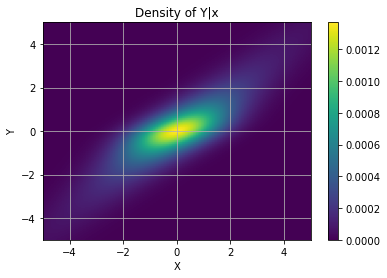

In [5]:
im = plt.imshow(p, origin='lower', aspect='auto', extent=(X[0], X[-1], Y[0], Y[-1]))
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r'X')
plt.ylabel(r'Y')
plt.title('Density of Y|x')
plt.colorbar(im)
plt.grid('off')

Text(0.5, 1.0, 'Grid Sampling of Y|X')

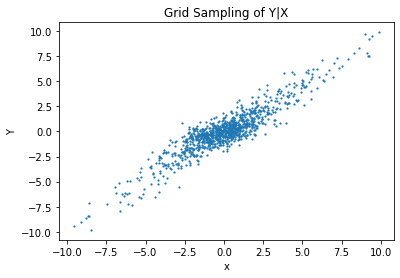

In [6]:
rng =np.random.RandomState(0)
#direct sampling scheme
nsamp = 1000
samp_indices = np.unravel_index(rng.choice(p.size, size = nsamp, p = p.ravel()), p.shape)
samp_X=X[samp_indices[1]]
samp_Y=Y[samp_indices[0]]
# add random jitter
samp_X += (rng.rand(nsamp)-0.5) * (X[1]-X[0])
samp_Y += (rng.rand(nsamp)-0.5) * (Y[1]-Y[0])
#scatter plot
plt.scatter(samp_X, samp_Y, 5, linewidth=0)
plt.xlabel(r'x')
plt.ylabel(r'Y')
plt.title("Grid Sampling of Y|X")

In [7]:
X= 0.5
n = [50, 250, 500, 1000]
b_result =[]
for i in range(len(n)):
    Y= np.linspace(-10, 10, n[i])
    f = np.exp(-((X-Y)**2)/2) * 1/(1+Y**2) 
    f_norm =f / np.sum(f)
    b_result.append(np. mean(Y*f_norm))

b_result 

[0.005323539826948737,
 0.0010647044935627942,
 0.0005323522467813972,
 0.0002661761233906985]

In [8]:
X=0.5
n = [50, 250, 500, 1000]
k= [100, 1000]
d_result = []
for i in range(len(n)): 
    for j in range(len(k)):
        Y=np.linspace(-10, 10, n[i])
        f = np.exp(-((X-Y)**2)/2) * 1/(1+Y**2)
        f_norm =f / np.sum(f)
        samp_indices = np.unravel_index(rng.choice(f_norm.size, size = k[j], p =f_norm), f_norm.shape)
        samp_Y=Y[samp_indices]
        d_result.append(np.mean(samp_Y*f_norm[samp_indices]))
        
d_result 

[0.04177758121111817,
 0.032046188205429614,
 0.008012479721169793,
 0.006846575677737114,
 0.004443234685959077,
 0.003628097720297517,
 0.0021109679254036457,
 0.0017341649564202965]